# 1. Score current methods

In [1]:
from common import score_models, draw_bar_plot, clean_string, load_predictions, load_trues

In [ ]:
from collections import defaultdict
import pandas as pd

""" Format table to dataframe """
def format_to_df(table_years:pd.DataFrame, metric:str, keys:list, years:str = [2020, 2021, 2022, 2023, 2024]):
    data = defaultdict(list)
    for i, key in enumerate(keys):
        data["year"] = years
        for year in years:
            value = table_years.loc[(key, str(year))][(metric, "Mean")]/100
            data[key].append(value)
    return pd.DataFrame(data)

## Default comparison

### Comparison with id aligned with Semantic Scholar

In [2]:
trues = load_trues("../reading_lists.csv", keys=["id_s2"])
preds = load_predictions([
    'current_methods/search_engines/preds/semantic_scholar', 
    'current_methods/search_engines/preds/google_scholar', 
    'current_methods/instructs_models/preds/gpt-4o-2024-08-06', 
    'current_methods/instructs_models/preds/gpt-4o-2024-08-06_json', 
    'current_methods/instructs_models/preds/gpt-4o-2024-08-06_structured_output', 
    'current_methods/instructs_models/preds/gemini-1.5-flash', 
    'current_methods/instructs_models/preds/gemini-1.5-flash_json', 
    'current_methods/instructs_models/preds/gemini-1.5-pro_json', 
    'current_methods/instructs_models/preds/OLMoE-1B-7B-0924-Instruct'
], keys=["id_s2"])

preds_names = [
    'Semantic Scholar', 
    'Google Scholar', 
    'GPT-4o-2024-08-06', 
    'GPT-4o-2024-08-06 (JM)', 
    'GPT-4o-2024-08-06 (SO)', 
    'Gemini 1.5 flash', 
    'Gemini 1.5 flash (JM)', 
    'Gemini 1.5 pro (JM)', 
    'OLMoE-1B-7B-0924-Instruct'
]

table = score_models(trues, preds, preds_names, split_by_years=False); table 
#print(table.to_latex(float_format="{:0.1f}".format))

recall                                   \
                                  A1         A2         A3       Mean   
Semantic Scholar            5.543417   3.086520   4.611578   4.413839   
Google Scholar              8.392037   5.166921   8.869446   7.476135   
GPT-4o-2024-08-06          11.114598  10.283630  11.605377  11.001202   
GPT-4o-2024-08-06 (JM)      7.047856   6.441813   6.839105   6.776258   
GPT-4o-2024-08-06 (SO)      6.919514   6.610457   6.581360   6.703777   
Gemini 1.5 flash            2.309704   3.552532   4.237099   3.366445   
Gemini 1.5 flash (JM)       6.452551   5.026271   6.173469   5.884097   
Gemini 1.5 pro (JM)         7.904815   7.565020   9.370263   8.280033   
OLMoE-1B-7B-0924-Instruct   0.882353   0.592080   0.966387   0.813606   

                                ndcg                                  \
                                  A1        A2         A3       Mean   
Semantic Scholar            3.858841  2.624848   3.329969   3.271219   
Google Scholar              7.238782  4.704589   7.124125   6.355832   
GPT-4o-2024-08-06          11.143898  9.836757  11.888099  10.956252   
GPT-4o-2024-08-06 (JM)      8.360255  6.812539   8.204081   7.792291   
GPT-4o-2024-08-06 (SO)      8.678278  6.842151   8.390550   7.970326   
Gemini 1.5 flash            2.191814  3.537345   3.343881   3.024347   
Gemini 1.5 flash (JM)       9.033245  6.717336   8.530102   8.093561   
Gemini 1.5 pro (JM)         7.196337  5.901731   7.780360   6.959476   
OLMoE-1B-7B-0924-Instruct   3.293106  0.981717   2.816517   2.363780   

                                 mrr                                   
                                  A1         A2         A3       Mean  
Semantic Scholar            7.119579   4.916495   6.537208   6.191094  
Google Scholar             13.024786   9.731530  12.653423  11.803246  
GPT-4o-2024-08-06          20.337111  17.701341  23.560691  20.533048  
GPT-4o-2024-08-06 (JM)     16.365008  15.042993  18.738562  16.715521  
GPT-4o-2024-08-06 (SO)     17.954758  14.558633  17.219349  16.577580  
Gemini 1.5 flash            4.358577   8.189484   5.451153   5.999738  
Gemini 1.5 flash (JM)      13.302288  12.110106  11.447221  12.286538  
Gemini 1.5 pro (JM)        14.481649  11.322256  16.524973  14.109626  
OLMoE-1B-7B-0924-Instruct   3.529412   3.529412   2.745098   3.267974

### Comparison using titles of predicted articles

In [3]:
trues = load_trues("../reading_lists.csv", keys=["id_title"])
preds = load_predictions([
    'current_methods/search_engines/preds/semantic_scholar', 
    'current_methods/search_engines/preds/google_scholar', 
    'current_methods/instructs_models/preds/gpt-4o-2024-08-06', 
    'current_methods/instructs_models/preds/gpt-4o-2024-08-06_json', 
    'current_methods/instructs_models/preds/gpt-4o-2024-08-06_structured_output', 
    'current_methods/instructs_models/preds/gemini-1.5-flash', 
    'current_methods/instructs_models/preds/gemini-1.5-flash_json', 
    'current_methods/instructs_models/preds/gemini-1.5-pro_json', 
    'current_methods/instructs_models/preds/OLMoE-1B-7B-0924-Instruct'
], keys=["id_title"])

preds_names = [
    'Semantic Scholar', 
    'Google Scholar', 
    'GPT-4o-2024-08-06', 
    'GPT-4o-2024-08-06 (JM)', 
    'GPT-4o-2024-08-06 (SO)', 
    'Gemini 1.5 flash', 
    'Gemini 1.5 flash (JM)', 
    'Gemini 1.5 pro (JM)', 
    'OLMoE-1B-7B-0924-Instruct'
]

table = score_models(trues, preds, preds_names, split_by_years=False); table 
#print(table.to_latex(float_format="{:0.1f}".format))

recall                                 \
                                  A1        A2         A3      Mean   
Semantic Scholar            5.543417  3.086520   4.611578  4.413839   
Google Scholar              8.522756  5.363000   9.065525  7.650427   
GPT-4o-2024-08-06          10.409649  9.237878  10.092772  9.913433   
GPT-4o-2024-08-06 (JM)      6.753739  5.844665   5.947840  6.182081   
GPT-4o-2024-08-06 (SO)      6.420405  5.915270   6.287242  6.207639   
Gemini 1.5 flash            1.922327  2.588813   3.103741  2.538294   
Gemini 1.5 flash (JM)       5.825100  4.792844   5.538549  5.385498   
Gemini 1.5 pro (JM)         7.708737  7.065911   9.036929  7.937192   
OLMoE-1B-7B-0924-Instruct   0.490196  0.592080   0.966387  0.682888   

                                ndcg                                 \
                                  A1        A2         A3      Mean   
Semantic Scholar            3.858841  2.624848   3.329969  3.271219   
Google Scholar              7.279317  4.857911   7.236432  6.457887   
GPT-4o-2024-08-06          10.204242  8.809707  10.337474  9.783808   
GPT-4o-2024-08-06 (JM)      8.096770  6.447401   7.400535  7.314902   
GPT-4o-2024-08-06 (SO)      8.021120  6.458284   8.226954  7.568786   
Gemini 1.5 flash            1.692383  2.446274   2.303782  2.147480   
Gemini 1.5 flash (JM)       5.836671  6.222662   7.318319  6.459218   
Gemini 1.5 pro (JM)         7.069526  5.535403   7.551214  6.718714   
OLMoE-1B-7B-0924-Instruct   2.741013  0.981717   2.816517  2.179749   

                                 mrr                                   
                                  A1         A2         A3       Mean  
Semantic Scholar            7.119579   4.916495   6.537208   6.191094  
Google Scholar             13.318903  10.025648  12.738562  12.027704  
GPT-4o-2024-08-06          18.498875  15.897420  20.521475  18.305923  
GPT-4o-2024-08-06 (JM)     16.365008  14.807699  18.064354  16.412353  
GPT-4o-2024-08-06 (SO)     16.484169  14.427914  17.219349  16.043811  
Gemini 1.5 flash            3.800702   5.373411   3.463955   4.212689  
Gemini 1.5 flash (JM)      12.125817  10.580694  10.256745  10.987752  
Gemini 1.5 pro (JM)        14.285571  10.898048  16.274973  13.819530  
OLMoE-1B-7B-0924-Instruct   2.352941   3.529412   2.745098   2.875817

## Recall evolution by years

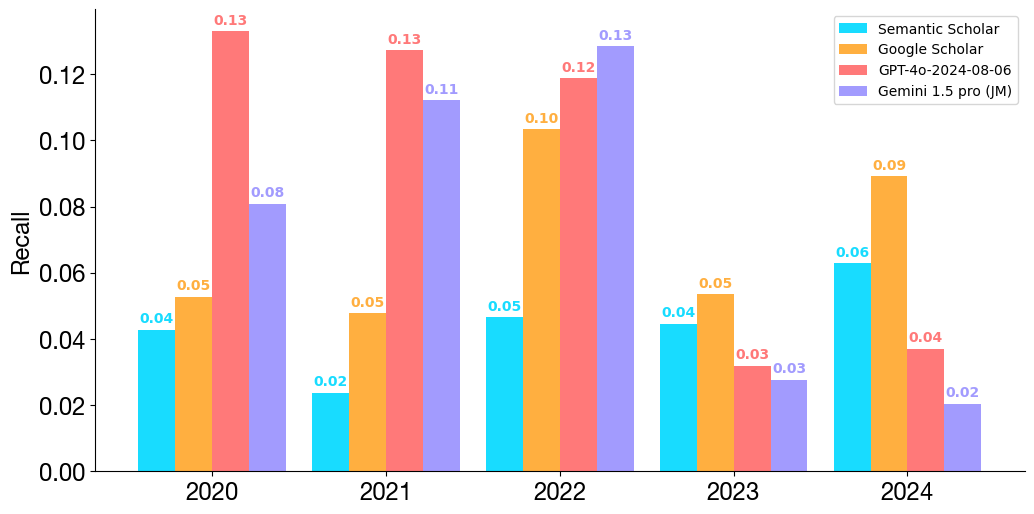

In [5]:
trues = load_trues("../reading_lists.csv", keys=["id_s2"])
preds = load_predictions([
    'current_methods/search_engines/preds/semantic_scholar', 
    'current_methods/search_engines/preds/google_scholar', 
    'current_methods/instructs_models/preds/gpt-4o-2024-08-06', 
    'current_methods/instructs_models/preds/gemini-1.5-pro_json', 
], keys=["id_s2"])

preds_names = [
    'Semantic Scholar', 
    'Google Scholar', 
    'GPT-4o-2024-08-06', 
    'Gemini 1.5 pro (JM)', 
]

table_years = score_models(trues, preds, preds_names, split_by_years=True) 
df = format_to_df(table_years, "recall", preds_names)
draw_bar_plot(df, ylabel="Recall")

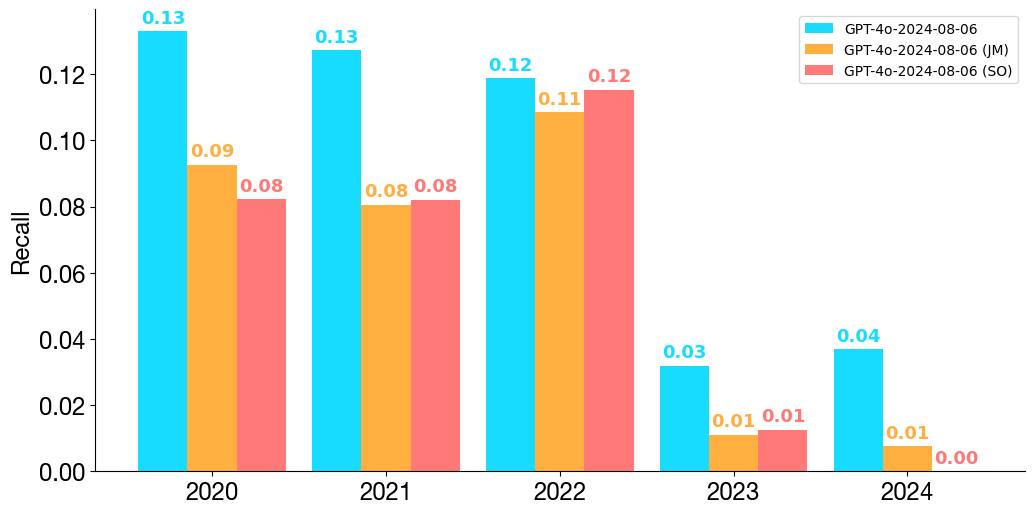

In [6]:
trues = load_trues("../reading_lists.csv", keys=["id_s2"])
preds = load_predictions([
    'current_methods/instructs_models/preds/gpt-4o-2024-08-06', 
    'current_methods/instructs_models/preds/gpt-4o-2024-08-06_json', 
    'current_methods/instructs_models/preds/gpt-4o-2024-08-06_structured_output', 
], keys=["id_s2"])

preds_names = [
    'GPT-4o-2024-08-06', 
    'GPT-4o-2024-08-06 (JM)', 
    'GPT-4o-2024-08-06 (SO)', 
]

table_years = score_models(trues, preds, preds_names, split_by_years=True) 
df = format_to_df(table_years, "recall", preds_names)
draw_bar_plot(df, ylabel="Recall")

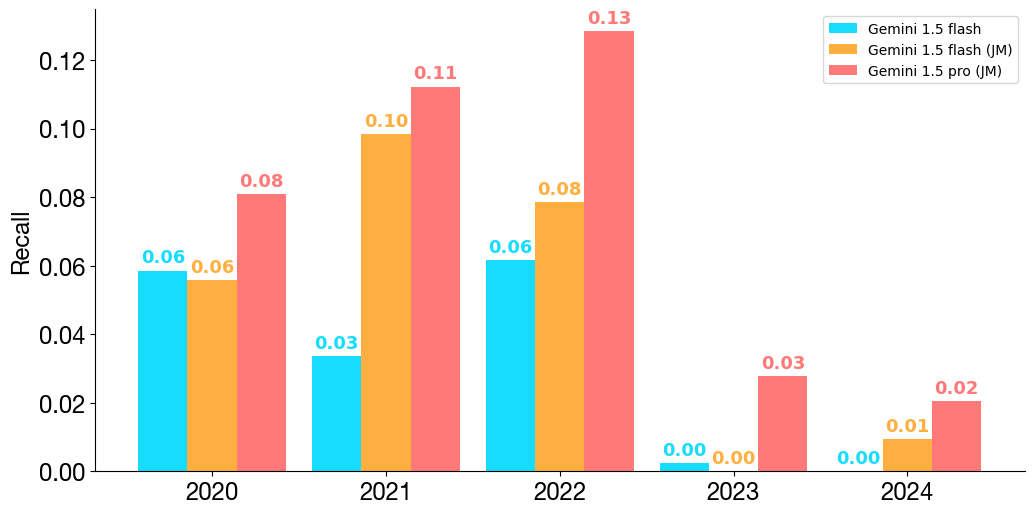

In [7]:
trues = load_trues("../reading_lists.csv", keys=["id_s2"])
preds = load_predictions([
    'current_methods/instructs_models/preds/gemini-1.5-flash', 
    'current_methods/instructs_models/preds/gemini-1.5-flash_json', 
    'current_methods/instructs_models/preds/gemini-1.5-pro_json', 
], keys=["id_s2"])

preds_names = [
    'Gemini 1.5 flash', 
    'Gemini 1.5 flash (JM)', 
    'Gemini 1.5 pro (JM)', 
]

table_years = score_models(trues, preds, preds_names, split_by_years=True) 
df = format_to_df(table_years, "recall", preds_names)
draw_bar_plot(df, ylabel="Recall")

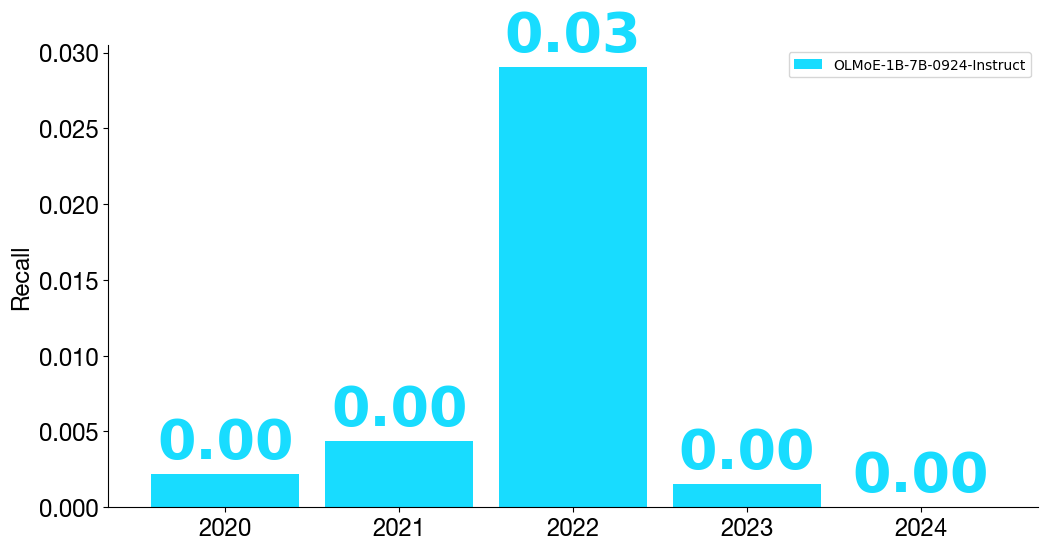

In [8]:
trues = load_trues("../reading_lists.csv", keys=["id_s2"])
preds = load_predictions([
    'current_methods/instructs_models/preds/OLMoE-1B-7B-0924-Instruct'
], keys=["id_s2"])

preds_names = [
    'OLMoE-1B-7B-0924-Instruct', 
]

table_years = score_models(trues, preds, preds_names, split_by_years=True) 
df = format_to_df(table_years, "recall", preds_names)
draw_bar_plot(df, ylabel="Recall")